<a href="https://colab.research.google.com/github/codedyasai/Python_MachineLearning/blob/main/22_KNN_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 현업에서 사용되는 머신러닝 프로젝트 진행 가이드

**1.문제를 정의하고 큰 그림을 그린다.**
- 목표를 비즈니스 용어로 정의한다 -> 도메인에 대한 인식
- 솔루션은 어떻게 사용할 것인지 확인
- 현재 해당 솔루션이 존재한다면 차선책으로 무엇인지
- 어떤 문제인지(알고리즘- 지도/비지도, 온라인/오프라인)
- 성능을 측정하는 방법
- 가설

**2. 데이터를 수집한다.**
- 데이터를 수집하는 기관, 별도로 데이터 수집을...
- 데이터의 양, 어떤 공간에 저장...
- 수집된 데이터를 확인
- 접근권한, 민감한 데이터의 처리

**3. 통찰을 얻기 위해 데이터를 탐색한다.** -> EDA, prerprocessing
- 사본
- 특징탐색, 시각화 탐색
- 상관
- 누락된, 이상치
- 보간법: 대체방법

**4. 데이터에 내재된 패턴이 머신러닝 알고리즘에 잘 드러나도록 데이터를 준비한다.**
- 훈련세트와 테스트세트 + 교차검증
- 검증세트
- 하이퍼파라미터 준비 -> 그리드 서치

**5. 여러 다른 모델을 시험해보고 가장 좋은 몇 개를 고른다.**
- 여러 종류의 모델과 기본 매개변수를 훈련
- 성능을 측정하고 비교
- 매개변수(파라미터, 하이퍼파라미터, 모델파라미터...)

**6. 모델을 세밀하게 튜닝하고 이들을 연결해 최선의 솔루션을 만든다.**

**7. 솔루션을 출시한다.**
- 보고서
- 발표 자료

**8. 시스템을 론칭하고 모니터링과 유지보수를 한다.**
- 불특정 다수에게 제공되는 서비스


In [ ]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

# 문제 정의
- 농구 선수의 경기 기록을 바탕으로 해당 선수들의 포지션을 예측해보자
- 2017년 NBA 농구 선수들의 게임 기록 데이터 셋
- 알고리즘: 분류(classification)
- 평가지표: confusion matrix, precision, ...

# 데이터 수집

- 2017년 NBA 농구 선수의 게임데이터

In [ ]:
df = pd.read_csv('basketball_stat.csv')

## 데이터 탐색
- 가설을 이용한 타당성 검증에 필요한 과정

In [ ]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


- Players: 선수이름
- Pos: 포지션
- 3P: 한 경기 평균 3점슛 성공 횟수
- 2P: 한 경기 평균 2점슛 성공 횟수
- TRB: 한 경기 평균 리바운드 성공 횟수
- AST: 한 경기 평균 어시스트 성공 횟수
- STL: 한 경기 평균 스틸 횟수
- BLK: 한 경기 평균 블로킹 성공 횟수

In [ ]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

- C(Center): 센터, 골대, 포스트 근처에서 슛을 블로킹하고, 리바운드하고, 공을 바깥으로 빼줘서 공격 찬스를 만드는 역할. 골대 근처에서 2점슛으로 득점을 하기도 한다.
- SG(Shooting Guard): 3점슛등 장거리에서 슛을 해서 점수를 얻는 역할

## 시각화를 통한 데이터 탐색

- 포지션을 예측하는 문제이다.
- 현재 가지고 있는 포지션은 센터와 슈팅가드만 존재한다.
- 불필요하다고 판단되는 특성을 찾아 처리한다.(2P, AST, STL)
- 불필요하다는 근거? 가설 입증이 필요하다

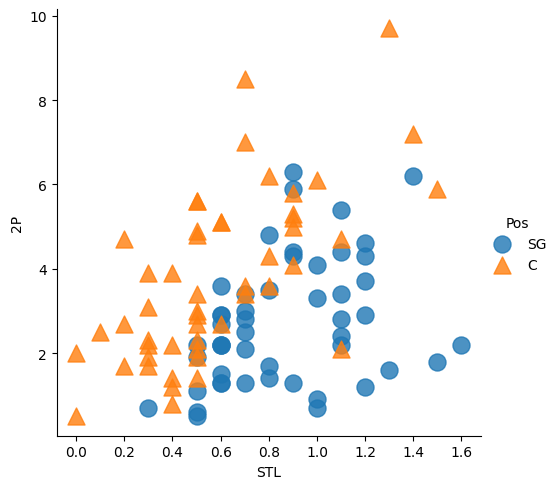

In [ ]:
# 스틸, 2점슛 시각화
sns.lmplot(x= 'STL', y= '2P', data= df,
           fit_reg = False,
           scatter_kws={'s': 150},
           hue= 'Pos',
           markers=['o', '^'])

plt.show()

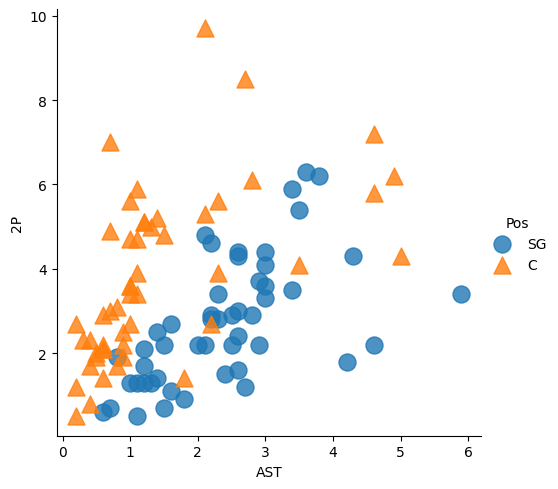

In [ ]:
# 어시스트, 2점슛 시각화
sns.lmplot(x= 'AST', y= '2P', data= df,
           fit_reg = False,
           scatter_kws={'s': 150},
           hue= 'Pos',
           markers=['o', '^'])

plt.show()

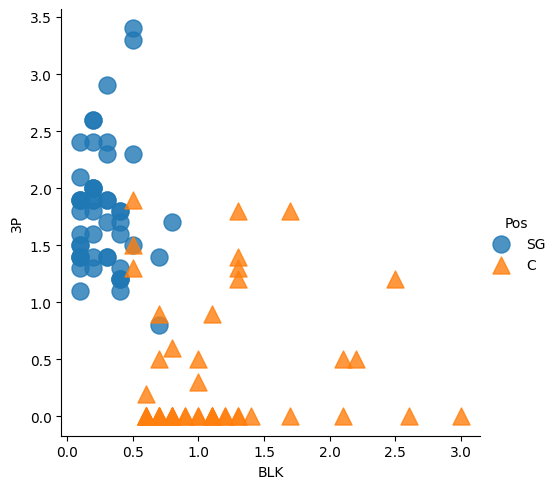

In [ ]:
# 블로킹, 3P
sns.lmplot(x= 'BLK', y= '3P', data= df,
           fit_reg = False,
           scatter_kws={'s': 150},
           hue= 'Pos',
           markers=['o', '^'])

plt.show()

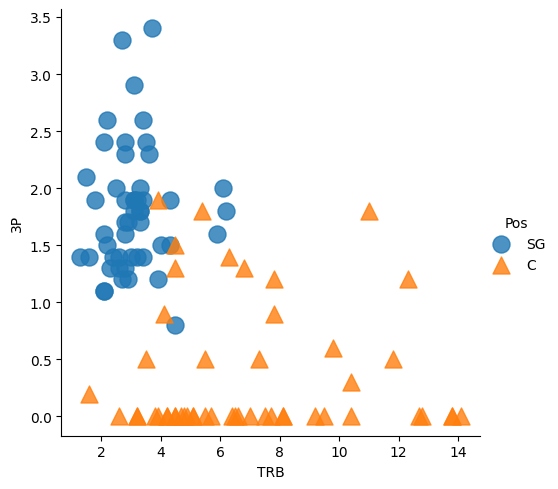

In [ ]:
# 리바운드, 3점슛
sns.lmplot(x= 'TRB', y= '3P', data= df,
           fit_reg = False,
           scatter_kws={'s': 150},
           hue= 'Pos',
           markers=['o', '^'])

plt.show()

# 데이터 전처리
- 앞선 시각화를 통해 2점슛, 어시스트,  스틸의 특성은 슈팅가드와 센터를 분류하는데 큰 도움이 되지 않는다는 것을 파악했다.
- 불필요하다고 판단한 속성을 제거하고 작업을 수행한다.

In [ ]:
df.drop(['2P', 'AST', 'STL'], axis= 1, inplace= True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [ ]:
x = df[['3P', 'BLK', 'TRB']]
y = df[['Pos']]
x.shape, y.shape

((100, 3), (100, 1))

## 훈련세트와 테스트세트 분리

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(80, 3) (20, 3)
(80, 1) (20, 1)


## 최적의 k 찾기
- knn 알고리즘에서 조절 가능한 변수는 오직 하나인 이웃의 개수(k)이다.
- k의 개수에 따라 모델의 예측값도 달라진다.
- 따라서 예측값이 가장 높은 최적의 k를 찾는 것이 knn 알고리즘에서 중요한 단계이다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 교차검증을 통해 k를 찾는 작업
# k의 범위는 학습 데이터의 절반을 사용

max_range = x_train.shape[0] // 2
k_list = []

for i in range(3, max_range, 2):
    k_list.append(i)


# 교차검증값을 저장할 변수
cross_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv= 10, scoring='accuracy')
    cross_scores.append(scores.mean())

cross_scores

[0.925,
 0.9375,
 0.925,
 0.9125,
 0.9,
 0.9125,
 0.9125,
 0.925,
 0.9,
 0.9,
 0.9125,
 0.8875,
 0.9,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.825]

In [ ]:
k = k_list[cross_scores.index(max(cross_scores))]
k

5

# 데이터 모델링

In [ ]:
knn = KNeighborsClassifier(n_neighbors= k)
knn.fit(x_train, y_train.values.ravel())

pred= knn.predict(x_test)

In [ ]:
comparison = pd.DataFrame({'prediction': pred, 'Actual': y_test.values.ravel()})
comparison

,prediction,Actual
0,SG,SG
1,SG,SG
2,SG,SG
3,SG,SG
4,SG,SG
5,SG,SG
6,SG,SG
7,C,C
8,SG,C
9,C,C


In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test.values.ravel(), pred))

Accuracy:  0.85
